In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
# Read data
train = pd.read_csv('train_final.csv')
test = pd.read_csv('test_final.csv')

/tmp/ipykernel_12329/3077261529.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train_final.csv')
/tmp/ipykernel_12329/3077261529.py:3: DtypeWarning: Columns (4,17,22,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('test_final.csv')


In [4]:
# Drop account_opening_date: it is not useful for the model
train = train.drop('account_opening_date',axis=1)
test = test.drop('account_opening_date',axis=1)
train

,Target,country_code,demog_1,demog_2,income,demog_3,city_tier,occupation,demog_4,demog_5,...,demog_39,email_domain,demog_40,demog_41,others_42,others_43,others_44,others_45,demog_42,demog_43
0,1,IN,55.0,1.0,100001 to 5L,101.0,Tier 2,Other,N,4.0,...,1,gmail,High,1,NaN,NaN,NaN,NaN,1,High
1,1,IN,55.0,2.0,100001 to 5L,101.0,Tier 8,Self_Employed,N,NaN,...,1,gmail,High,1,NaN,NaN,NaN,NaN,1,High
2,1,IN,53.0,2.0,5L to 10L,101.0,Tier 1,Self_Employed,N,4.0,...,1,gmail,medium,1,NaN,NaN,NaN,NaN,1,medium
3,1,IN,55.0,3.0,10L to 25L,101.0,Tier 1,Self_Employed,N,3.0,...,1,gmail,medium,1,NaN,NaN,NaN,NaN,1,High
4,1,IN,56.0,2.0,100001 to 5L,101.0,Tier 7,Self_Employed,N,2.0,...,1,gmail,High,1,NaN,NaN,NaN,NaN,1,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,IN,401.0,4.0,0 to 1L,103.0,Tier 4,Homemaker,N,3.0,...,1,Others,High,1,NaN,NaN,NaN,NaN,1,medium
69996,0,IN,55.0,6.0,0 to 1L,101.0,Tier 7,Student,N,4.0,...,1,gmail,low,1,NaN,NaN,NaN,NaN,1,medium
69997,0,IN,56.0,2.0,0 to 1L,101.0,Tier 5,Self_Employed,N,2.0,...,1,gmail,low,1,NaN,NaN,NaN,NaN,1,medium
69998,0,IN,55.0,3.0,10L to 25L,101.0,Tier 2,Self_Employed,6,4.0,...,1,gmail,medium,1,NaN,NaN,NaN,NaN,1,medium


In [5]:
# Combine train and test data
df = pd.concat([train,test],axis=0)
df

,Target,country_code,demog_1,demog_2,income,demog_3,city_tier,occupation,demog_4,demog_5,...,demog_39,email_domain,demog_40,demog_41,others_42,others_43,others_44,others_45,demog_42,demog_43
0,1,IN,55.0,1.0,100001 to 5L,101.0,Tier 2,Other,N,4.0,...,1,gmail,High,1,NaN,NaN,NaN,NaN,1,High
1,1,IN,55.0,2.0,100001 to 5L,101.0,Tier 8,Self_Employed,N,NaN,...,1,gmail,High,1,NaN,NaN,NaN,NaN,1,High
2,1,IN,53.0,2.0,5L to 10L,101.0,Tier 1,Self_Employed,N,4.0,...,1,gmail,medium,1,NaN,NaN,NaN,NaN,1,medium
3,1,IN,55.0,3.0,10L to 25L,101.0,Tier 1,Self_Employed,N,3.0,...,1,gmail,medium,1,NaN,NaN,NaN,NaN,1,High
4,1,IN,56.0,2.0,100001 to 5L,101.0,Tier 7,Self_Employed,N,2.0,...,1,gmail,High,1,NaN,NaN,NaN,NaN,1,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,IN,55.0,7.0,100001 to 5L,101.0,Tier 4,Other,N,3.0,...,1,gmail,low,1,NaN,NaN,NaN,NaN,1,medium
29996,0,IN,55.0,1.0,0 to 1L,101.0,Tier 1,Salaried,N,4.0,...,1,gmail,medium,1,NaN,NaN,NaN,NaN,1,medium
29997,0,IN,55.0,10.0,5L to 10L,101.0,Tier 3,Other,NaN,4.0,...,1,yahoo,High,1,NaN,NaN,NaN,NaN,1,High
29998,0,IN,52.0,10.0,50L to 3Crore,101.0,Tier 1,Other,NaN,4.0,...,1,gmail,medium,1,NaN,NaN,0.0,234.0,1,medium


In [24]:
# Seeing the columns
for i in df.columns:
    print(i)

Target
country_code
demog_1
demog_2
income
demog_3
city_tier
occupation
demog_4
demog_5
demog_6
demog_7
demog_8
demog_9
demog_10
demog_11
demog_12
demog_13
demog_14
demog_15
demog_16
demog_17
demog_18
demog_19
demog_20
demog_21
demog_22
os
txn_1
txn_2
txn_3
txn_4
txn_5
txn_6
txn_7
txn_8
txn_9
txn_10
txn_11
txn_12
txn_13
txn_14
txn_15
txn_16
txn_17
txn_18
txn_19
txn_20
txn_21
txn_22
txn_23
txn_24
txn_25
txn_26
txn_27
txn_28
txn_29
txn_30
txn_31
txn_32
txn_33
txn_34
txn_35
txn_36
txn_37
txn_38
txn_39
txn_40
txn_41
txn_42
txn_43
txn_44
txn_45
txn_46
txn_47
txn_48
txn_49
txn_50
txn_51
txn_52
txn_53
txn_54
txn_55
txn_56
txn_57
txn_58
txn_59
txn_60
txn_61
txn_62
txn_63
txn_64
txn_65
txn_66
txn_67
txn_68
txn_69
txn_70
txn_71
txn_72
txn_73
txn_74
txn_75
txn_76
txn_77
txn_78
txn_79
others_1
others_2
others_3
others_4
others_5
others_6
others_7
others_8
others_9
others_10
others_11
others_12
others_13
others_14
others_15
others_16
others_17
others_18
others_19
others_20
others_21
others_22
other

In [6]:
# Insights
dflists = []
rem_cols = []
for i in df.columns:
    if not i.startswith('demog') and not i.startswith('txn') and not i.startswith('others') and i != 'Target':
        rem_cols.append(i)
        fraudvals = df[df['Target']==1][i].unique()
        notfraudvals = [x for x in df[i].unique() if x not in fraudvals and x is not np.nan]
        if len(dflists)>0:
            currdf = dflists[-1]
        else:
            currdf = df
        dflists.append(currdf[~currdf[i].isin(notfraudvals)])
        print("People who did fraud:")
        print(fraudvals)
        print("People who didn't do fraud:")
        print(notfraudvals)
        print()

People who did fraud:
['IN']
People who didn't do fraud:
['SG', 'US', 'GB', 'CN', 'AU', 'MY', 'CA', 'KW', 'AE', 'DE', 'IE', 'QA', 'SA', 'NZ', 'JP', 'FJ', 'CH', 'PH', 'PL', 'LU', 'ZM', 'MX', 'HK', 'BE', 'GH', 'MG', 'FR', 'SI', 'NL', 'OM', 'ZA', 'FI', 'SE', 'DK', 'ES', 'LK', 'NG', 'BH', 'PT', 'MU', 'TH', 'JO', 'KR', 'ID', 'KY', 'CL', 'CZ', 'RU']

People who did fraud:
['100001 to 5L' '5L to 10L' '10L to 25L' '0 to 1L' '50L to 3Crore'
 '25L to 50L' '3Crore to 5Crore' nan]
People who didn't do fraud:
['0', '5Crore to 10Crore', '15Crore to 20Crore', '20Crore to 35Crore', '10Crore to 15Crore']

People who did fraud:
['Tier 2' 'Tier 8' 'Tier 1' 'Tier 7' 'Rural' 'Tier 3' 'Tier 5' 'Tier 6'
 'Tier 4' nan]
People who didn't do fraud:
[]

People who did fraud:
['Other' 'Self_Employed' 'Student' 'Salaried' 'Homemaker' 'Retired'
 'Unemployed' 'Minor']
People who didn't do fraud:
[]

People who did fraud:
['and' nan 'ios']
People who didn't do fraud:
[]

People who did fraud:
['gmail' 'Others' 'yahoo

In [110]:
# You can remove these many people:
print("Using",rem_cols[0],", you can remove :")
print(df.shape[0]-dflists[0].shape[0])
for i in range(1,len(dflists)):
    print("Using ",rem_cols[i],", you can remove :")
    print(dflists[i-1].shape[0]-dflists[i].shape[0])

Using country_code , you can remove :
487
Using  income , you can remove :
3821
Using  city_tier , you can remove :
0
Using  occupation , you can remove :
0
Using  os , you can remove :
0
Using  email_domain , you can remove :
695


In [153]:
# Seeing people with no income
df[df['income']=='0']

,Target,country_code,demog_1,demog_2,income,demog_3,city_tier,occupation,demog_4,demog_5,...,demog_39,email_domain,demog_40,demog_41,others_42,others_43,others_44,others_45,demog_42,demog_43
1412,0,NaN,NaN,NaN,0,101.0,NaN,Other,NaN,4.0,...,1,Others,NaN,0,NaN,NaN,NaN,NaN,0,NaN
1432,0,NaN,NaN,NaN,0,101.0,NaN,Other,NaN,4.0,...,1,Others,NaN,0,NaN,NaN,NaN,NaN,0,NaN
1499,0,NaN,NaN,NaN,0,101.0,NaN,Other,NaN,3.0,...,1,Others,NaN,0,NaN,NaN,NaN,NaN,0,NaN
1518,0,NaN,NaN,NaN,0,101.0,NaN,Other,NaN,4.0,...,1,Others,NaN,0,NaN,NaN,NaN,NaN,0,NaN
1569,0,NaN,NaN,NaN,0,101.0,NaN,Other,NaN,4.0,...,1,Others,NaN,0,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29914,0,NaN,NaN,NaN,0,101.0,NaN,Other,NaN,3.0,...,1,Others,NaN,0,NaN,NaN,NaN,NaN,0,NaN
29919,0,NaN,NaN,NaN,0,101.0,NaN,Other,NaN,4.0,...,1,Others,NaN,0,NaN,NaN,NaN,NaN,0,NaN
29934,0,NaN,NaN,NaN,0,101.0,NaN,Other,NaN,4.0,...,1,Others,NaN,0,NaN,NaN,NaN,NaN,0,NaN
29949,0,NaN,NaN,NaN,0,101.0,NaN,Other,NaN,3.0,...,1,Others,NaN,0,NaN,NaN,NaN,NaN,0,NaN


In [162]:
for i in df[df['income']=='0']:
    print(df[df['income']=='0'][i].value_counts(dropna=False))

Target
0    3816
Name: count, dtype: int64
country_code
NaN    3665
IN      151
Name: count, dtype: int64
demog_1
NaN      3667
53.0       53
54.0       23
56.0       22
55.0       22
401.0      11
51.0        8
57.0        6
52.0        2
421.0       1
58.0        1
Name: count, dtype: int64
demog_2
NaN     3667
1.0      108
1.0       14
11.0       7
2.0        5
1          4
ZZ         3
2.0        2
11         2
6.0        1
2          1
7.0        1
6.0        1
Name: count, dtype: int64
income
0    3816
Name: count, dtype: int64
demog_3
101.0    3804
104.0       8
103.0       3
168.0       1
Name: count, dtype: int64
city_tier
NaN       3665
Tier 1      93
Tier 8      13
Rural       10
Tier 2       9
Tier 3       8
Tier 5       7
Tier 7       6
Tier 6       4
Tier 4       1
Name: count, dtype: int64
occupation
Other            3672
Salaried          127
Self_Employed       8
Minor               7
Student             2
Name: count, dtype: int64
demog_4
NaN    3804
N        10
5    

In [159]:
df[df['income']=='0'].value_counts()

Series([], Name: count, dtype: int64)

In [7]:
fdf = dflists[-1]

In [8]:
fdf.shape

(94997, 176)

In [9]:
df.shape[0] - fdf.shape[0]

5003

In [117]:
for i in fdf.columns:
    print(i)

Target
country_code
demog_1
demog_2
income
demog_3
city_tier
occupation
demog_4
demog_5
demog_6
demog_7
demog_8
demog_9
demog_10
demog_11
demog_12
demog_13
demog_14
demog_15
demog_16
demog_17
demog_18
demog_19
demog_20
demog_21
demog_22
os
txn_1
txn_2
txn_3
txn_4
txn_5
txn_6
txn_7
txn_8
txn_9
txn_10
txn_11
txn_12
txn_13
txn_14
txn_15
txn_16
txn_17
txn_18
txn_19
txn_20
txn_21
txn_22
txn_23
txn_24
txn_25
txn_26
txn_27
txn_28
txn_29
txn_30
txn_31
txn_32
txn_33
txn_34
txn_35
txn_36
txn_37
txn_38
txn_39
txn_40
txn_41
txn_42
txn_43
txn_44
txn_45
txn_46
txn_47
txn_48
txn_49
txn_50
txn_51
txn_52
txn_53
txn_54
txn_55
txn_56
txn_57
txn_58
txn_59
txn_60
txn_61
txn_62
txn_63
txn_64
txn_65
txn_66
txn_67
txn_68
txn_69
txn_70
txn_71
txn_72
txn_73
txn_74
txn_75
txn_76
txn_77
txn_78
txn_79
others_1
others_2
others_3
others_4
others_5
others_6
others_7
others_8
others_9
others_10
others_11
others_12
others_13
others_14
others_15
others_16
others_17
others_18
others_19
others_20
others_21
others_22
other

In [130]:
transacts = fdf[fdf['Target'] == 1]

In [131]:
transacts

,Target,country_code,demog_1,demog_2,income,demog_3,city_tier,occupation,demog_4,demog_5,...,demog_39,email_domain,demog_40,demog_41,others_42,others_43,others_44,others_45,demog_42,demog_43
0,1,IN,55.0,1.0,100001 to 5L,101.0,Tier 2,Other,N,4.0,...,1,gmail,High,1,NaN,NaN,NaN,NaN,1,High
1,1,IN,55.0,2.0,100001 to 5L,101.0,Tier 8,Self_Employed,N,NaN,...,1,gmail,High,1,NaN,NaN,NaN,NaN,1,High
2,1,IN,53.0,2.0,5L to 10L,101.0,Tier 1,Self_Employed,N,4.0,...,1,gmail,medium,1,NaN,NaN,NaN,NaN,1,medium
3,1,IN,55.0,3.0,10L to 25L,101.0,Tier 1,Self_Employed,N,3.0,...,1,gmail,medium,1,NaN,NaN,NaN,NaN,1,High
4,1,IN,56.0,2.0,100001 to 5L,101.0,Tier 7,Self_Employed,N,2.0,...,1,gmail,High,1,NaN,NaN,NaN,NaN,1,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1,IN,53.0,3.0,5L to 10L,101.0,Tier 6,Self_Employed,N,2.0,...,1,gmail,High,1,NaN,NaN,NaN,NaN,1,High
596,1,IN,53.0,3.0,5L to 10L,101.0,Tier 8,Self_Employed,N,2.0,...,1,gmail,High,1,NaN,NaN,NaN,NaN,1,High
597,1,IN,55.0,6.0,100001 to 5L,101.0,Rural,Student,N,3.0,...,1,gmail,low,1,NaN,NaN,NaN,NaN,1,medium
598,1,IN,55.0,1.0,100001 to 5L,101.0,Tier 6,Salaried,N,4.0,...,1,gmail,High,1,NaN,NaN,NaN,NaN,1,medium


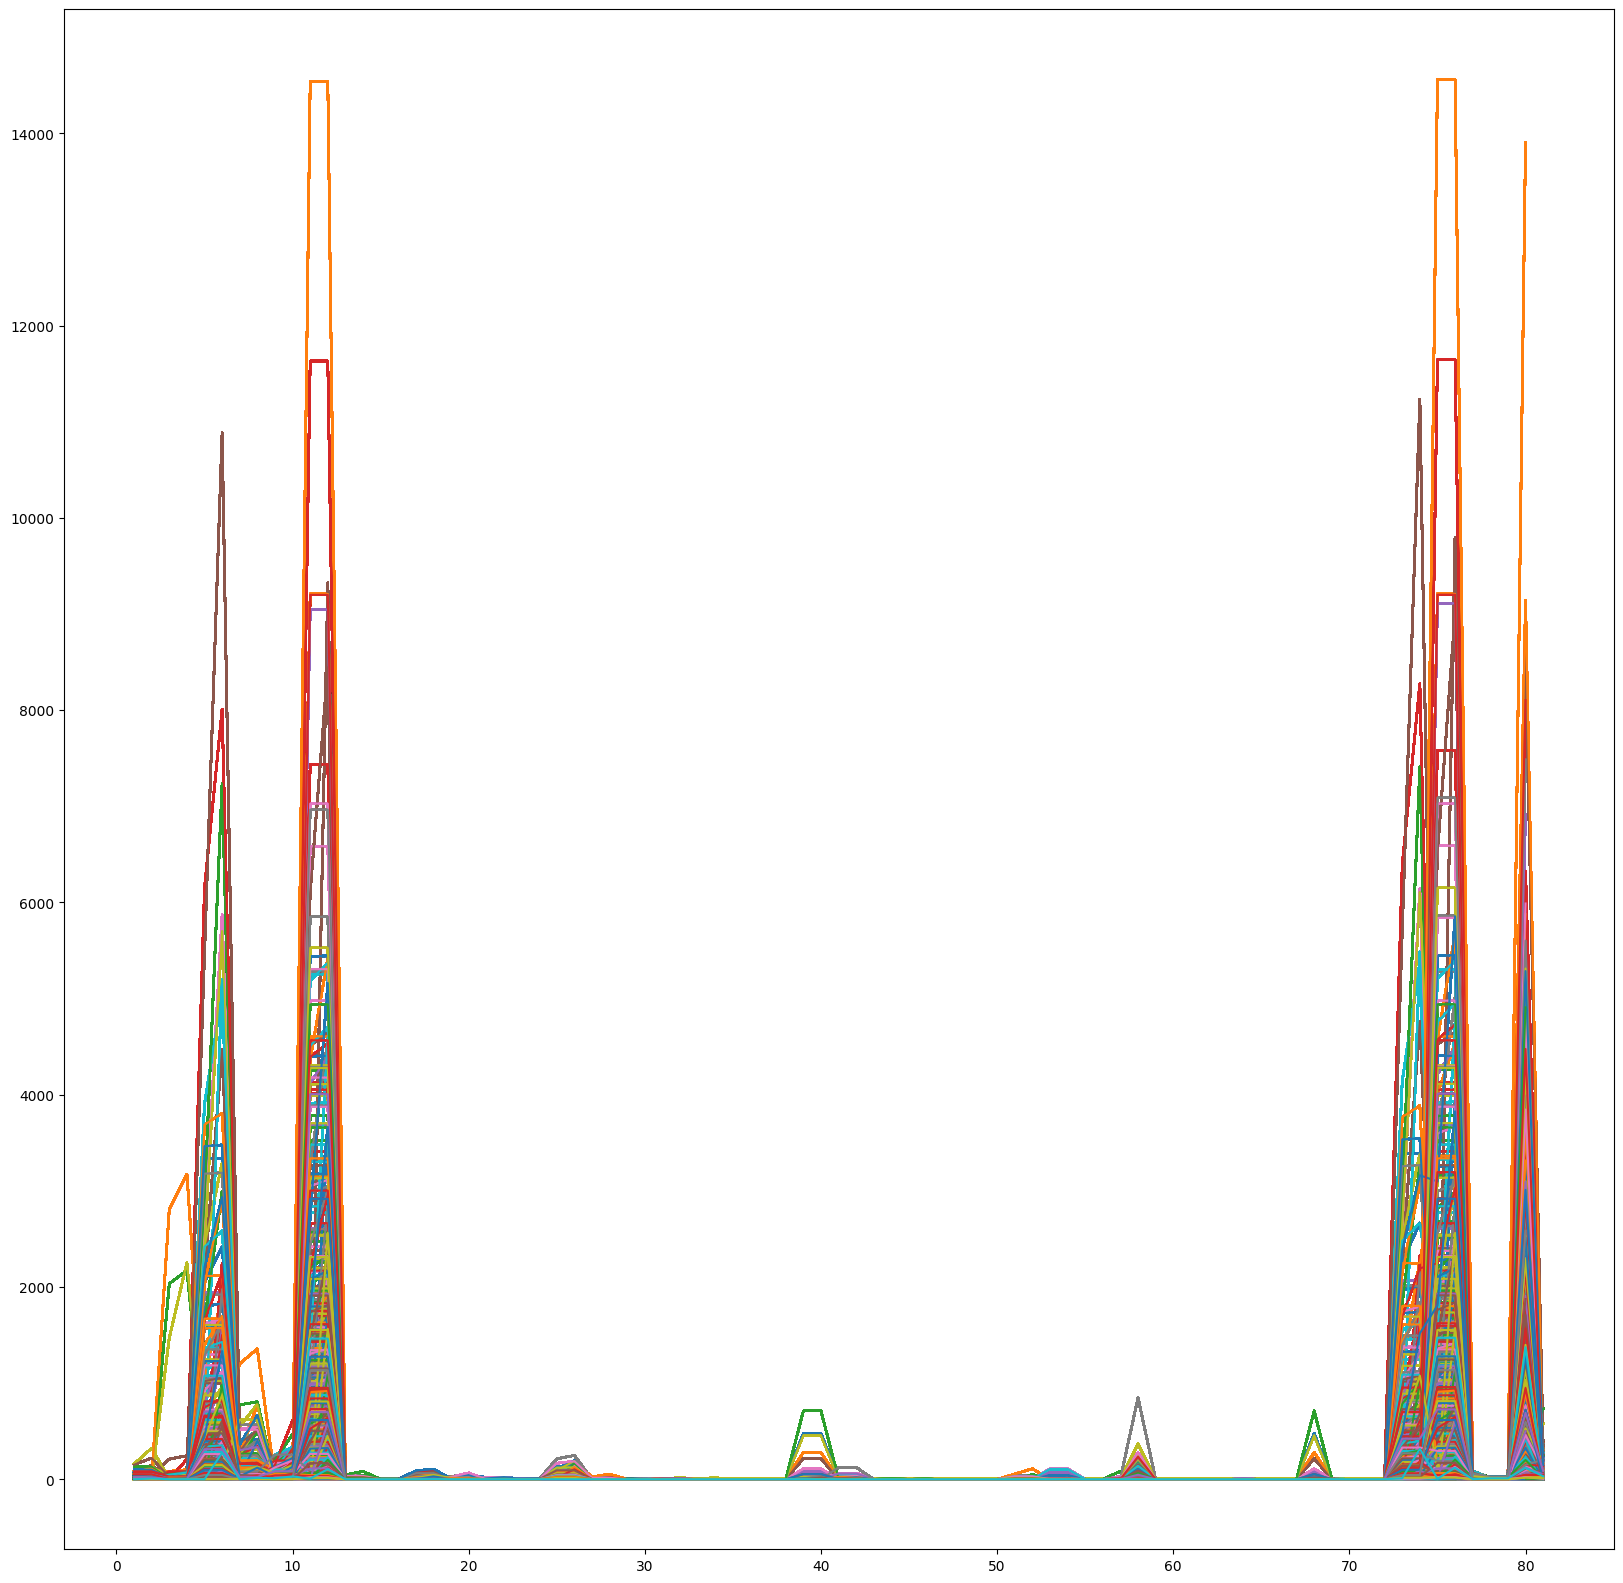

In [133]:
# Plotting the transactions of fraudsters
plt.figure(figsize=(20,20))
for i in transacts:
    plt.plot(range(1,82),[transacts[j] for j in transacts.columns if j.startswith('txn')])
plt.show()
plt.savefig('fraudtransactions.png')

In [142]:
train.shape

(70000, 176)

In [10]:
ctrain = pd.merge(fdf,train,how='inner')

In [11]:
ctest = pd.merge(fdf,test,how='inner')

In [12]:
fdf.shape

(94997, 176)

In [13]:
ctrain.shape[0] + ctest.shape[0]

95105

In [ ]:
ctrain.to_csv('cleantrain.csv',index=False)
ctest.to_csv('cleantest.csv',index=False)

In [14]:
ctrain[ctrain['Target']==1].shape

(1400, 176)

In [15]:
ctest[ctest['Target']==1].shape

(600, 176)

In [28]:
ctrain = pd.read_csv('cleantrain.csv')
ctest = pd.read_csv('cleantest.csv')
cdata = pd.concat([ctrain,ctest],axis=0)

/tmp/ipykernel_14658/1869804988.py:1: DtypeWarning: Columns (17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  ctrain = pd.read_csv('cleantrain.csv')
/tmp/ipykernel_14658/1869804988.py:2: DtypeWarning: Columns (16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  ctest = pd.read_csv('cleantest.csv')


In [4]:
for i in cdata.columns:
    print(i,":" ,cdata[cdata['Target']==1][i].isnull().sum(),"/",cdata[cdata['Target']==1].shape[0])

Target : 0 / 2000
country_code : 0 / 2000
demog_1 : 0 / 2000
demog_2 : 0 / 2000
income : 1 / 2000
demog_3 : 1 / 2000
city_tier : 1 / 2000
occupation : 0 / 2000
demog_4 : 69 / 2000
demog_5 : 16 / 2000
demog_6 : 0 / 2000
demog_7 : 1 / 2000
demog_8 : 47 / 2000
demog_9 : 833 / 2000
demog_10 : 1 / 2000
demog_11 : 0 / 2000
demog_12 : 0 / 2000
demog_13 : 5 / 2000
demog_14 : 5 / 2000
demog_15 : 5 / 2000
demog_16 : 5 / 2000
demog_17 : 0 / 2000
demog_18 : 0 / 2000
demog_19 : 0 / 2000
demog_20 : 0 / 2000
demog_21 : 0 / 2000
demog_22 : 0 / 2000
os : 184 / 2000
txn_1 : 129 / 2000
txn_2 : 129 / 2000
txn_3 : 129 / 2000
txn_4 : 129 / 2000
txn_5 : 129 / 2000
txn_6 : 129 / 2000
txn_7 : 129 / 2000
txn_8 : 129 / 2000
txn_9 : 129 / 2000
txn_10 : 129 / 2000
txn_11 : 129 / 2000
txn_12 : 129 / 2000
txn_13 : 129 / 2000
txn_14 : 129 / 2000
txn_15 : 129 / 2000
txn_16 : 129 / 2000
txn_17 : 129 / 2000
txn_18 : 129 / 2000
txn_19 : 129 / 2000
txn_20 : 129 / 2000
txn_21 : 129 / 2000
txn_22 : 129 / 2000
txn_23 : 129 /

In [5]:
for i in cdata.columns:
    print(i,":" ,cdata[cdata['Target']==0][i].isnull().sum(),"/",cdata[cdata['Target']==0].shape[0])

Target : 0 / 93105
country_code : 1 / 93105
demog_1 : 2 / 93105
demog_2 : 1 / 93105
income : 4 / 93105
demog_3 : 4 / 93105
city_tier : 104 / 93105
occupation : 2 / 93105
demog_4 : 4493 / 93105
demog_5 : 9 / 93105
demog_6 : 1 / 93105
demog_7 : 4 / 93105
demog_8 : 34 / 93105
demog_9 : 8220 / 93105
demog_10 : 2 / 93105
demog_11 : 1 / 93105
demog_12 : 1 / 93105
demog_13 : 6 / 93105
demog_14 : 6 / 93105
demog_15 : 6 / 93105
demog_16 : 6 / 93105
demog_17 : 1 / 93105
demog_18 : 1 / 93105
demog_19 : 1 / 93105
demog_20 : 1 / 93105
demog_21 : 1 / 93105
demog_22 : 1 / 93105
os : 20469 / 93105
txn_1 : 21847 / 93105
txn_2 : 21847 / 93105
txn_3 : 21847 / 93105
txn_4 : 21847 / 93105
txn_5 : 21847 / 93105
txn_6 : 21847 / 93105
txn_7 : 21847 / 93105
txn_8 : 21847 / 93105
txn_9 : 21847 / 93105
txn_10 : 21847 / 93105
txn_11 : 21847 / 93105
txn_12 : 21847 / 93105
txn_13 : 21847 / 93105
txn_14 : 21847 / 93105
txn_15 : 21847 / 93105
txn_16 : 21847 / 93105
txn_17 : 21847 / 93105
txn_18 : 21847 / 93105
txn_19

In [8]:
cdata[cdata.filter(like='txn').isna().all(axis=1)]['Target'].value_counts()

Target
0    21833
1      114
Name: count, dtype: int64

In [33]:
ctrain2 = ctrain.drop(index=ctrain.loc[ctrain.filter(like='txn').isna().all(axis=1)].index)
ctest2 = ctest.drop(index=ctest.loc[ctest.filter(like='txn').isna().all(axis=1)].index)

In [17]:
ctrain.shape[0]-ctrain2.shape[0]

15315

In [18]:
ctest.shape[0]-ctest2.shape[0]

6632

In [19]:
ctrain2.shape

(51261, 176)

In [20]:
ctest2.shape

(21897, 176)

In [22]:
cdata2 = pd.concat([ctrain2,ctest2],axis=0)

In [23]:
for i in cdata2.columns:
    print(i,":" ,cdata2[i].isnull().sum(),"/",cdata2.shape[0])

Target : 0 / 73158
country_code : 0 / 73158
demog_1 : 0 / 73158
demog_2 : 0 / 73158
income : 3 / 73158
demog_3 : 3 / 73158
city_tier : 86 / 73158
occupation : 0 / 73158
demog_4 : 4250 / 73158
demog_5 : 20 / 73158
demog_6 : 0 / 73158
demog_7 : 3 / 73158
demog_8 : 66 / 73158
demog_9 : 7335 / 73158
demog_10 : 2 / 73158
demog_11 : 0 / 73158
demog_12 : 0 / 73158
demog_13 : 8 / 73158
demog_14 : 8 / 73158
demog_15 : 8 / 73158
demog_16 : 8 / 73158
demog_17 : 0 / 73158
demog_18 : 0 / 73158
demog_19 : 0 / 73158
demog_20 : 0 / 73158
demog_21 : 0 / 73158
demog_22 : 0 / 73158
os : 8681 / 73158
txn_1 : 29 / 73158
txn_2 : 29 / 73158
txn_3 : 29 / 73158
txn_4 : 29 / 73158
txn_5 : 29 / 73158
txn_6 : 29 / 73158
txn_7 : 29 / 73158
txn_8 : 29 / 73158
txn_9 : 29 / 73158
txn_10 : 29 / 73158
txn_11 : 29 / 73158
txn_12 : 29 / 73158
txn_13 : 29 / 73158
txn_14 : 29 / 73158
txn_15 : 29 / 73158
txn_16 : 29 / 73158
txn_17 : 29 / 73158
txn_18 : 29 / 73158
txn_19 : 29 / 73158
txn_20 : 29 / 73158
txn_21 : 29 / 73158
t

In [24]:
cdata2 = cdata2.drop(['others_42','others_43','others_44','others_45'],axis=1)

In [25]:
cdata2.shape

(73158, 172)

In [34]:
ctrain2.drop(['others_42','others_43','others_44','others_45'],inplace=True,axis=1)
ctest2.drop(['others_42','others_43','others_44','others_45'],inplace=True,axis=1)

In [35]:
ctrain2.to_csv('cleantrain2.csv',index=False)
ctest2.to_csv('cleantest2.csv',index=False)

In [36]:
ctrain2.shape

(51261, 172)

In [37]:
ctest2.shape

(21897, 172)